<a href="https://colab.research.google.com/github/sebastianrdz/portafolio-implementacion/blob/main/Modulo2_RegresionLineal(Algoritmo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Sebastian Rodriguez Salinas 
- A00827463
- Sep 14, 2022

# Realacion entre calorias y proteinas de los alimentos


## Definicion de los datos a trabajar

In [ ]:
# Conexion a google drive
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
# Definir ruta dentro de google drive
%cd "/content/gdrive/MyDrive/Colab Notebooks"
!ls 

/content/gdrive/MyDrive/Colab Notebooks
 A00827463_SebastianRdz_Modulo1_Mercurio.ipynb		   mercurio.csv
 A00827463_SebastianRdz_Modulo1_Salarios.ipynb		   Mod2_Aug10.ipynb
 A00827463_SebastianRdz_Modulo2_Modelo.ipynb		   PlayDataset.csv
 A00827463_SebastianRdz_Modulo2_RegresionLineal.ipynb	   PlayDataset.ipynb
'Copia de A00827463_SebastianRdz_Modulo1_Salarios.ipynb'   Practicas
 ds_salaries.csv					   Retos
 mc-donalds-menu.csv					   wine.data


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Lectura de datos
data = pd.read_csv("mc-donalds-menu.csv", delimiter=',')
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Definicion de datos

In [ ]:
# Seccionamiento de datos
calories = data["Calories"]
protein = data["Protein"]
cal_train = calories[60:]
pro_train = protein[60:] * 4 #Multiplicar por 4 para comparar calorias de proteinas con calorias totales
cal_test = calories[:59]
pro_test = protein[:59] * 4 #Multiplicar por 4 para comparar calorias de proteinas con calorias totales

### Variables Auxiliares

In [ ]:
alpha = 0.000001
theta = [1,1]

h   = lambda x,theta: theta[0]+theta[1]*x
j_i = lambda x,y,theta: (y-h(x,theta))**2 

n = len(pro_train)

## Entrenamiento


In [ ]:
for idx in range(10000):
  acumDelta = []
  acumDeltaX = []
  for x_i, y_i in zip(cal_train, pro_train):
    acumDelta.append(h(x_i,theta)-y_i)
    acumDeltaX.append((h(x_i,theta)-y_i)*x_i)

  sJt0 = sum(acumDelta)  
  sJt1 = sum(acumDeltaX)
  theta[0] = theta[0]-alpha/n*sJt0
  theta[1] = theta[1]-alpha/n*sJt1

print(theta)

[0.9885098384858307, 0.1320208545819503]


In [ ]:
n_train = len(pro_train)
n_validate = len(pro_test)

# Validación
acumDelta = []
for x_i, y_i in zip(cal_test,pro_test):
  acumDelta.append(j_i(x_i,y_i,theta))

sDelta = sum(acumDelta)  
J_validate = 1/(2*n_validate)*sDelta


# Training
acumDelta = []
for x_i, y_i in zip(cal_train,pro_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta


print(J_validate)
print(J_train)
print(theta)
# Explicando theta, el primer numero representa la racion en comparacion a los datos completos. Vemos que tiende el primer numero a 1 lo que es correcto ya que representa el total de calorias de la comida.
# Asi mismo vemos que tiende el segundo numero a 0.16 lo que representa que en relacion con las calorias totales, las proteinas componen en promedio un 16% de las calorias totales para las comidas de McDonalds.

491.28054435678763
381.6803899161536
[0.9885098384858307, 0.1320208545819503]


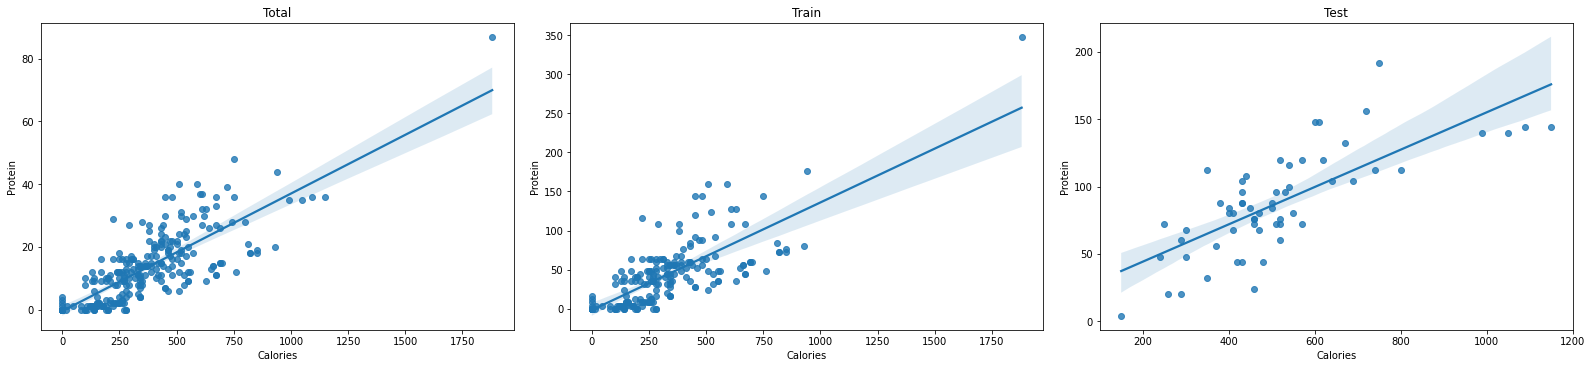

In [ ]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(22,5))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
sns.regplot(ax=ax1, x=calories, y=protein).set(title='Total');
sns.regplot(ax=ax2, x=cal_train, y=pro_train).set(title='Train');
sns.regplot(ax=ax3, x=cal_test, y=pro_test).set(title='Test');